# Load the dataset
Data is conveiently shaped numpy arrays. train_images are 60,000 images having dimensions of 28x28. There are 60,0000 orresponding training labels. The test set has similarly sized 10,000 images.

In [17]:
import keras
import numpy as np
import matplotlib.pyplot as plt
keras.__version__

'2.2.4'

In [18]:
from keras.datasets import mnist

In [19]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

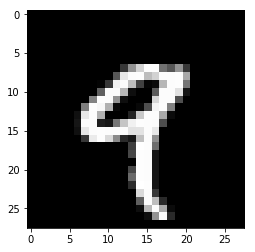

In [20]:
# Below is displayed what a typical image looks like in the dataset
plt.figure(figsize = (4, 4))
plt.imshow(train_images[4], cmap = 'gray')
plt.show()

# Network Architecture

In [21]:
from keras import models
from keras import layers
import numpy as np

The building blocks of neural networks are layers. Data processing occurs here and it can be thought of as a filter for data. Layers extract representations out of the data fed into them. Optimally many layers can be combined to form a process of data distillation.

The network made here will be a sequence of two Dense layers (fully conected) neural layers. The second layer is a 10-way softmax layer, which means it will return an array of 10 probabilty scores. Each score will be the probability that the current digit image belongs to one of the 10 digit classes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.

In [22]:
image_shape_x, image_shape_y = np.shape(train_images)[1], np.shape(train_images)[2]

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(image_shape_x * image_shape_y,)))
network.add(layers.Dense(10, activation = 'softmax'))

Below, we define the loss function, the optimizer, and the meterics to monitor progress.

The loss function measures how the network will be able to measure its own performance on the training images.

The optimizer will be the mechanism which the network will use to update itself based on the data it is presented with.

The metrics to monitor during training nad testing will be accuracy in this example which will be as a measure of the fraction of images that were correctly classified.

categorical_crossentropy is the loss function that's used a feddback signal for leanring the weight tensors, and which the training phase will attempt to minimize.

In [23]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Data Preparation
Before we train the network we will preprocess the data by reshaping and scaling the data values between [0, 1].

In [24]:
train_images = train_images.reshape((np.shape(train_images)[0], image_shape_x*image_shape_y))
train_images = train_images.astype('float32')/255.

test_images = test_images.reshape((np.shape(test_images)[0], image_shape_x*image_shape_y))
test_images = test_images.astype('float32')/255.

# Prepare the labels
The labels will be categorically encoded. The resulting train_labels will be shaped 60,000 x 10. to_categorical converts a vector of integers o a binary class matrix. Originally train_labels was a vector of shape 60,000, after to_categorical (60000x10).


What originally was a 1 in the original vector can be represented as
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [25]:
from keras.utils import to_categorical

In [26]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [27]:
np.shape(train_labels)

(60000, 10)

# Fit the model
The network will start to iterate on the training data in the mini-batches of 128 samples, 5 times over. Aafter every iteration, the network will update the weights by computing the gradients of the weights with thregaurd to the loss function.

After 5 batches, the netwrok should have performed 2, 345 gradient updates (469 persecond).

We will fit the model to the training set and the new categorical labels we created above. We can see the accuracy of the model is about 98.91% on the training data. On the testing data, the model appears to be 98.08% accurate, alightly lower than the testing data. THe gap between the training and testing accuracy is an example of overfitting. The machine learning model performed worse on new data because the model becomes biased towards the training data.

In [28]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.2537 - acc: 0.9249
Epoch 2/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.1034 - acc: 0.9698
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.0669 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0496 - acc: 0.9846
Epoch 5/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.0370 - acc: 0.9889


In [29]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 27us/step


## Get the testing accuracy of the model

In [30]:
print('test_acc:', test_acc)

test_acc: 0.9773
